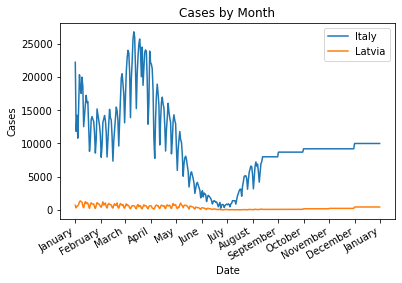

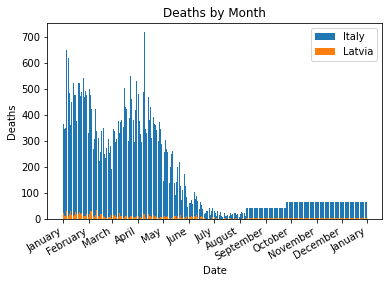

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates




a = pd.read_csv(r"C:\Users\Nexus\Documents\GitHub\gala-darbs\prediction_1.csv")
x = pd.read_csv(r"C:\Users\Nexus\Documents\GitHub\gala-darbs\owid-covid-data.csv", usecols=["new_cases", "new_deaths", "location", "date"])
y = pd.read_csv(r"C:\Users\Nexus\Documents\GitHub\gala-darbs\data.csv", usecols=["Country/Territory", "Cases", "Recovered"])


a.rename(columns={"Country": "location", #rename col
                  "Date": "date",
                  "Cases": "new_cases",
                  "Deaths": "new_deaths"}, inplace=True)

ax = pd.merge(x, a, on=None, how="outer") #merge csv

it = ax[ax["location"] == "Italy"]
lv = ax[ax["location"] == "Latvia"]
it2 = it[it["date"] >= "2021-01-01"]
lv2 = lv[lv["date"] >= "2021-01-01"]
it3 = y[y["Country/Territory"] == "Italy"]
lv3 = y[y["Country/Territory"] == "Latvia"]



plt.plot(it2["date"], it2["new_cases"])
plt.plot(lv2["date"], lv2["new_cases"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B')) #format date by months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title("Cases by Month")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(["Italy", "Latvia"])
plt.show()


plt.bar(it2["date"], it2["new_deaths"])
plt.bar(lv2["date"], lv2["new_deaths"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B')) #format date by months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title("Deaths by Month")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend(["Italy", "Latvia"])
plt.show()
